<a href="https://colab.research.google.com/github/KacaU-lab/CodersLab-Vizualization/blob/main/kaggle_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from google.colab import drive

## Kaggle datasets

In this notebook we are going to discuss the collection of dataset available on the kaggle platform.

The data is published under the CC0 license on [this kaggle page](https://www.kaggle.com/canggih/voted-kaggle-dataset) and we have adapted it for classes.

Let's get familiar with the content of the notebook and follow the instructions to prepare the data that we are going to need during classes.

**Note!** When you come back to the document later, remember to re-run the code cells.

### Dataset contents

The dataset contains information on:
*   **Title** - name of the dataset,
*   **Data Type** - format that the data is published in,
*   **License** - type of license regulating the use of the set,
*   **Votes** - number of votes for the set,
*   **Views** - number of views of the set,
*   **Downloads** - number of downloads of the set,
*   **Kernels** - number of kernels based on the set,
*   **Topics** - number of topics.







The necessary data is provided with the document: the code below imports the file.

In [2]:
# === 1) Připojit Google Drive a vyhledat soubor ===
from google.colab import drive
import glob, os, re

# Připojit disk
drive.mount('/content/drive', force_remount=False)

# Vyhledat soubor s názvem "kaggle"
candidates = glob.glob('/content/drive/**/kaggle*.csv', recursive=True)

if not candidates:
    print("⚠️ Soubor s názvem obsahujícím 'kaggle' nebyl nalezen. Zkontroluj, zda je nahraný na Google Disku.")
else:
    print("✅ Nalezené cesty:")
    for i, path in enumerate(sorted(candidates)):
        print(f"[{i}] {path}")

Mounted at /content/drive
✅ Nalezené cesty:
[0] /content/drive/MyDrive/Colab Notebooks/Vis/Kaggle Datasets/kaggle-ds.csv


In [4]:
# === 2) Načtení datasetu ===
import pandas as pd

# Cesta k souboru (uprav podle výsledku výpisu výše)
PATH = "/content/drive/MyDrive/Colab Notebooks/Vis/Kaggle Datasets/kaggle-ds.csv"

# Načtení CSV do DataFrame
kaggle = pd.read_csv(PATH)

# Výpis informací
print(f"[OK] Soubor načten: {PATH}")
print(f"Tvar: {kaggle.shape[0]} řádků × {kaggle.shape[1]} sloupců\n")

# Náhled dat
kaggle.head()

[OK] Soubor načten: /content/drive/MyDrive/Colab Notebooks/Vis/Kaggle Datasets/kaggle-ds.csv
Tvar: 2150 řádků × 8 sloupců



,Title,Data Type,License,Votes,Views,Downloads,Kernels,Topics
0,Credit Card Fraud Detection,CSV,ODbL,1241,442136.0,53128.0,1782.0,26.0
1,European Soccer Database,SQLite,ODbL,1046,396214.0,46367.0,1459.0,75.0
2,TMDB 5000 Movie Dataset,CSV,Other,1024,446255.0,62002.0,1394.0,46.0
3,Global Terrorism Database,CSV,Other,789,187877.0,26309.0,608.0,11.0
4,Bitcoin Historical Data,CSV,CC4,618,146734.0,16868.0,68.0,13.0


## Notebook preparation

We want to start by making sure that the data has been correctly identified and make necessary conversions.

Based on data overview, we expect the first column to contain text-based information that makes it possible to tell the different datasets apart. We also expect that **Data Type** and **License** columns store text-based information about categories.

We assume that the remaining columns are numeric. Let's check the actual data in the set.

### Checking data types

Below, we need to run the listed instructions to get the DataFrames used during classes.

First let's check how the data was identified on import.

In [5]:
# === 3) Kontrola datových typů ===
kaggle.dtypes.to_frame("dtype")

,dtype
Title,object
Data Type,object
License,object
Votes,int64
Views,float64
Downloads,float64
Kernels,float64
Topics,float64


We need to verify if the data has records where any of the columns is missing information.

In [6]:
# === 4) Kontrola počtu kompletních a nekompletních záznamů ===
complete = kaggle.dropna(how="any").shape[0]
total = len(kaggle)
print(f"✅ Počet kompletních záznamů: {complete} / {total} (celkem)")

✅ Počet kompletních záznamů: 845 / 2150 (celkem)


## Dataset type conversion

Let's look at the information on the data types in the **Data Type** column.

In [7]:
# === 5) Přehled hodnot ve sloupci 'Data Type' ===
kaggle["Data Type"].value_counts(dropna=False)

,count
Data Type,
CSV,1593
Other,468
{}JSON,56
SQLite,25
BigQuery,8


In this case we can only identify the data type as a categorical one.

In [8]:
# === 6) Převod 'Data Type' na kategorický typ ===
kaggle["Data Type"] = kaggle["Data Type"].astype("category")

print("[OK] Sloupec 'Data Type' byl převeden na kategorický typ.")
kaggle.dtypes.to_frame("dtype")

[OK] Sloupec 'Data Type' byl převeden na kategorický typ.


,dtype
Title,object
Data Type,category
License,object
Votes,int64
Views,float64
Downloads,float64
Kernels,float64
Topics,float64


### Converting licenses to categories

Next, let's see what types of licenses are in the **License** column.

In [9]:
# === 7) Přehled hodnot ve sloupci 'License' ===
kaggle["License"].value_counts(dropna=False)

,count
License,
CC0,845
Other,751
CC4,324
ODbL,181
GPL,26
CC3,23


Here, it is also enough if the data is identified as a category.

In [10]:
# === 8) Převod 'License' na kategorický typ ===
kaggle["License"] = kaggle["License"].astype("category")

print("[OK] Sloupec 'License' byl převeden na kategorický typ.")
kaggle.dtypes.to_frame("dtype")

[OK] Sloupec 'License' byl převeden na kategorický typ.


,dtype
Title,object
Data Type,category
License,category
Votes,int64
Views,float64
Downloads,float64
Kernels,float64
Topics,float64


### Numeric variables analysis

Let's spend a moment reviewing the basic statistics for numeric variables

In [11]:
# === 9) Analýza číselných proměnných ===
kaggle.describe()

,Votes,Views,Downloads,Kernels,Topics
count,2150.000000,2145.000000,2135.000000,1206.000000,1558.000000
mean,24.011628,7299.300699,923.793443,38.392206,1.261874
std,64.788465,22660.139843,3098.584600,147.499168,3.589140
min,2.000000,29.000000,0.000000,2.000000,0.000000
25%,4.000000,750.000000,60.000000,3.000000,0.000000
50%,8.000000,1930.000000,187.000000,7.000000,0.000000
75%,19.000000,5151.000000,602.000000,21.000000,2.000000
max,1241.000000,446255.000000,62002.000000,3394.000000,75.000000


Note that in all cases we can see that maximum values are many times higher that the mean ones; and that for all statistics except  **Topics**, standard deviation is multiple times higher than the mean.
We expect to see significant outliers in this collection of datasets.

## Exercises

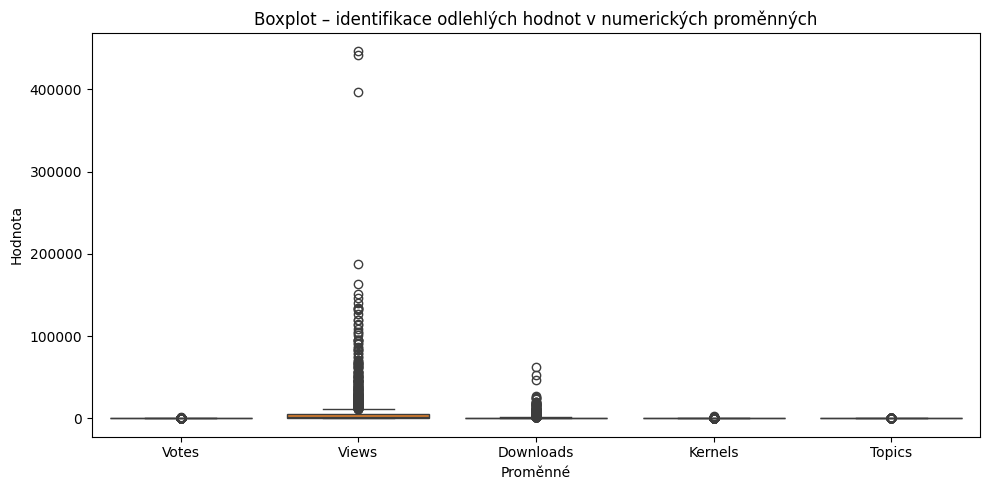

In [12]:
# === 10) Boxplot všech numerických proměnných ===
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(data=kaggle.select_dtypes(include=["float64", "int64"]))
plt.title("Boxplot – identifikace odlehlých hodnot v numerických proměnných")
plt.ylabel("Hodnota")
plt.xlabel("Proměnné")
plt.tight_layout()
plt.show()


# 💬 Interpretace:
# - Tento boxplot zobrazuje rozložení všech numerických sloupců (Votes, Views, Downloads, Kernels, Topics).
# - Každý obdélník představuje 50 % hodnot kolem mediánu (IQR = interkvartilové rozpětí).
# - Tečky mimo obdélníky jsou odlehlé hodnoty (outliery).
# - Z grafu je patrné, že všechny proměnné mají značný rozptyl — nejvíce Views a Downloads.
# - To znamená, že část datasetů má extrémní popularitu (velký počet hlasů nebo zhlédnutí),

#   zatímco většina zůstává na nízkých hodnotách.

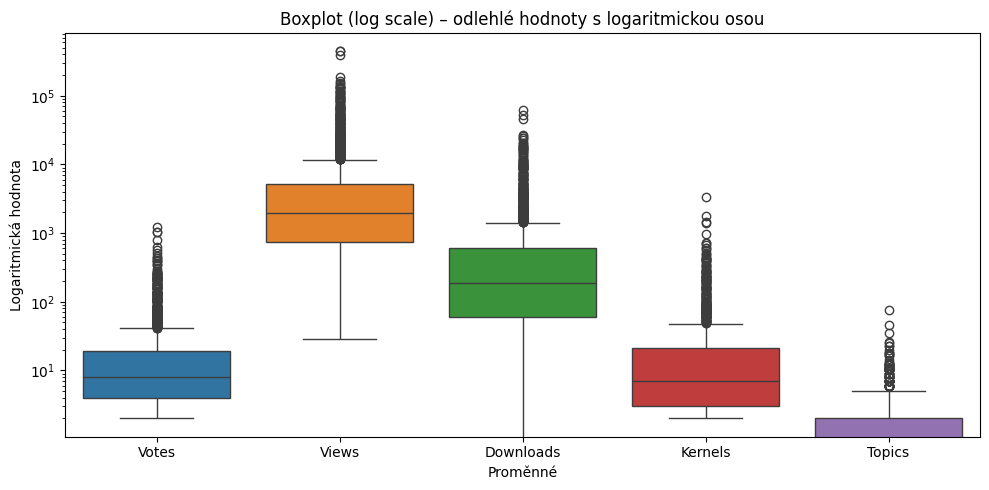

In [13]:
# === 11) Boxplot s logaritmickou osou Y ===
plt.figure(figsize=(10,5))
sns.boxplot(data=kaggle.select_dtypes(include=["float64", "int64"]))
plt.yscale("log")
plt.title("Boxplot (log scale) – odlehlé hodnoty s logaritmickou osou")
plt.ylabel("Logaritmická hodnota")
plt.xlabel("Proměnné")
plt.tight_layout()
plt.show()

# 💬 Interpretace:
# - Logaritmická osa pomáhá přehledněji zobrazit data, která se liší o několik řádů.
# - Nyní vidíme, že rozložení Votes, Views a Downloads je silně pravostranně roztažené (long tail).
# - Většina datasetů má nízké hodnoty, ale malý počet záznamů vykazuje mimořádně vysoké hodnoty (např. miliony zhlédnutí).
# - Tento efekt je typický pro platformy s uživatelským obsahem — několik málo „superpopulárních“ datasetů dominuje.

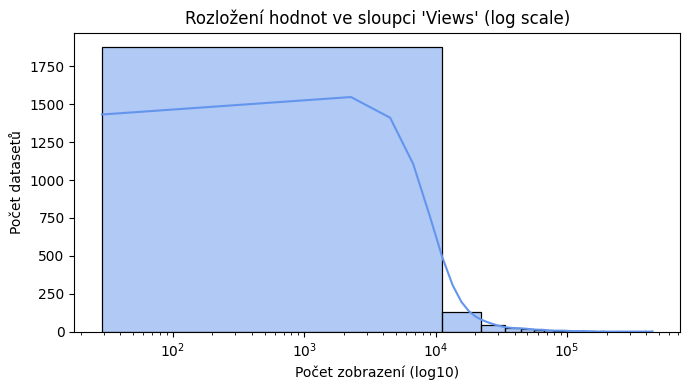

In [14]:
# === 12) Histogram pro 'Views' – rozložení hodnot ===
plt.figure(figsize=(7,4))
sns.histplot(kaggle["Views"], bins=40, color="cornflowerblue", kde=True)
plt.xscale("log")
plt.title("Rozložení hodnot ve sloupci 'Views' (log scale)")
plt.xlabel("Počet zobrazení (log10)")
plt.ylabel("Počet datasetů")
plt.tight_layout()
plt.show()

# 💬 Interpretace:
# - Histogram zobrazuje, jak jsou rozložené počty zobrazení (Views) na logaritmické ose.
# - Většina datasetů má relativně málo zobrazení (např. 10²–10³),
#   zatímco jen malý počet dosahuje desetitisíců až milionů.
# - Modrá křivka KDE ukazuje hustotu rozložení: jeden hlavní vrchol pro běžné datasety
#   a dlouhý „ocas“ směrem k vyšším hodnotám.
# - Tento tvar potvrzuje přítomnost výrazných outlierů a velmi nerovnoměrnou distribuci popularity.
